In [ ]:
def rendimiento_de_mercado(s, e, m='US'):
    # Es una función que regresa el rendimiento de mercado anualizado
    # s = Start (Fecha de inicio)
    # e = End (Fecha final)
    print('Obtaining market returns...')
    if m == 'US':
        ticker = '^GSPC'
    elif m == 'MX':
        ticker = '^MXX'
    snp = web.DataReader(ticker, 'yahoo', start, end)
    cm = snp['Adj Close']
    snp['returns'] = snp['Adj Close'].pct_change()
    snp = snp['returns']
    snp = snp+1
    rmercado = (1+(np.prod(snp)**(1/len(snp))-1))**252-1
    f=dict()
    f['rmercado'] = rmercado  
    f['cm'] = cm
    return f

In [ ]:
def standard_deviation(prop, cov):
    Desv_est_port = np.sqrt(np.dot(np.transpose(prop),np.dot(cov, prop)))
    return Desv_est_port

In [ ]:
def get_stock_prices(t, s, e):
    closes = pd.DataFrame()
    print('Obtaining stocks data...')
    count = 1
    for ticker in t:
        df = web.DataReader(ticker, 'yahoo', start, end)
        closes['{}'.format(ticker)] = df['Adj Close']
        print(str(count)+' stock of '+ str(len(t)))
        count += 1
    snp = web.DataReader('^GSPC', 'yahoo', start, end)
    snp['returns'] = snp['Adj Close'].pct_change()
    returns = closes.pct_change()
    returns['S&P'] = snp['returns']
    snp_var = np.var(returns['S&P'])
    betas = returns.cov()
    betas = betas['S&P']
    betas = betas/snp_var
    betas.drop('S&P', inplace=True)
    f = rendimiento_de_mercado(s, e)
    RMercado = f['rmercado']
    close_mercado = f['cm']
    r1 = returns + 1
    anual_returns = (1+(np.prod(r1)**(1/len(r1))-1))**252-1
    anual_returns.drop('S&P', inplace=True)
    matriz_cov = r1.cov()*252
    matriz_cov.drop('S&P', inplace=True)
    matriz_cov.drop('S&P', inplace=True, axis='columns')
    closes_corr = closes.corr()
    data = closes_corr.values
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn)
    fig.colorbar(heatmap)
    ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    column_labels = closes_corr.columns
    row_labels = closes_corr.index
    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap.set_clim(-1,1)
    plt.title('Correlation graphic')
    plt.show()
    
    
    r = dict()
    r['betas'] = betas
    r['rendimientos'] = anual_returns
    r['cov'] = matriz_cov
    r['daily'] = returns
    r['cm'] = close_mercado
    r['closes'] = closes
    return r

Obtaining stocks data...
1 stock of 10
2 stock of 10
3 stock of 10
4 stock of 10
5 stock of 10
6 stock of 10
7 stock of 10
8 stock of 10
9 stock of 10
10 stock of 10
Obtaining market returns...


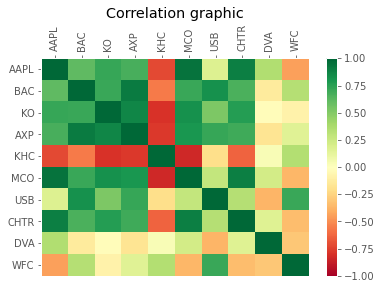

Annual return 20.86%
Standard Deviation: 20.75%
Beta: 0.98


In [ ]:
def obtener_beta(t, s, e, prop):
    d = get_stock_prices(t, s, e)
    betas = d['betas']
    rendimientos = d['rendimientos']
    matriz_cov = d['cov']
    matriz_de_proporciones = pd.DataFrame(prop, columns = ['Proporcion'], index=t)
    DE = float(standard_deviation(matriz_de_proporciones, matriz_cov))
    Rend_port = float(np.dot(np.transpose(matriz_de_proporciones), rendimientos))
    Beta_port = round(float(np.dot(np.transpose(matriz_de_proporciones), betas)), 2)
    DE_porcentaje = round(DE*100, 2)
    Rend_port_porcentaje = round(Rend_port*100, 2)
    
    print('Annual return '+str(Rend_port_porcentaje)+'%')
    print('Standard Deviation: '+str(DE_porcentaje)+'%')
    print('Beta: '+str(Beta_port))   
    
tickers = ['AAPL','BAC','KO', 'AXP', 'KHC', 'MCO', 'USB', 'CHTR', 'DVA', 'WFC']
prop = [0.4778, 0.1063, 0.0863, 0.0664, 0.0426, 0.0312, 0.0207, 0.0142, 0.0135, 0.0131]
start = dt.datetime(2015, 8, 31) # Fecha de inicio (yy/mm/dd)
end = dt.datetime(2020, 8, 28) # Fecha final (yy/mm/dd)

obtener_beta(tickers, start, end, prop)

In [ ]:
def random_proportions(n):
    r = [random.random() for i in range(n)]
    s = sum(r)
    r = [ i/s for i in r ]
    return r

Obtaining stocks data...
1 stock of 10
2 stock of 10
3 stock of 10
4 stock of 10
5 stock of 10
6 stock of 10
7 stock of 10
8 stock of 10
9 stock of 10
10 stock of 10
Obtaining market returns...


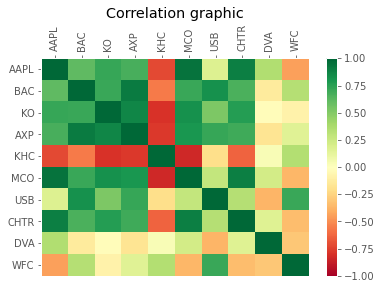

Comenzando primeras iteraciones...
0 of 20,000
1000 of 20,000
2000 of 20,000
3000 of 20,000
4000 of 20,000
5000 of 20,000
6000 of 20,000
7000 of 20,000
8000 of 20,000
9000 of 20,000
10000 of 20,000
11000 of 20,000
12000 of 20,000
13000 of 20,000
14000 of 20,000
15000 of 20,000
16000 of 20,000
17000 of 20,000
18000 of 20,000
19000 of 20,000
Finalizado
Comenzando segundas iteraciones...
0 of 20,000
1000 of 20,000
2000 of 20,000
3000 of 20,000
4000 of 20,000
5000 of 20,000
6000 of 20,000
7000 of 20,000
8000 of 20,000
9000 of 20,000
10000 of 20,000
11000 of 20,000
12000 of 20,000
13000 of 20,000
14000 of 20,000
15000 of 20,000
16000 of 20,000
17000 of 20,000
18000 of 20,000
19000 of 20,000
Finalizado


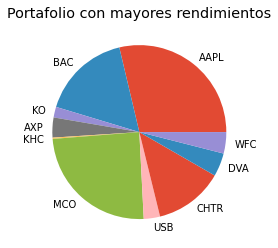

AAPL    28.70
BAC     16.63
KO       1.97
AXP      3.72
KHC      0.24
MCO     24.55
USB      3.03
CHTR    12.85
DVA      4.34
WFC      3.97
Name: 4665, dtype: float64
Annual return: 22.0%
Standard Deviation: 24.0%
Beta: 1.17


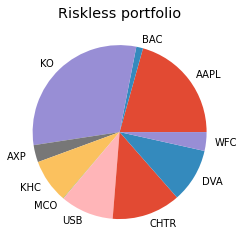

AAPL    20.66
BAC      1.26
KO      30.49
AXP      3.20
KHC      8.11
MCO      0.10
USB      9.91
CHTR    12.74
DVA     10.05
WFC      3.49
Name: 14363, dtype: float64
Annual return: 13.0%
Standard Deviation: 19.0%
Beta: 0.92
(10,)


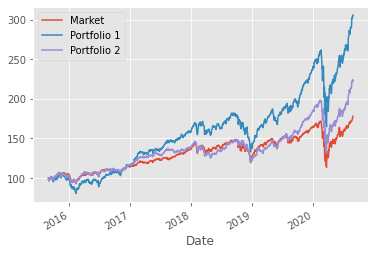

In [ ]:
tickers = ['AAPL','BAC','KO', 'AXP', 'KHC', 'MCO', 'USB', 'CHTR', 'DVA', 'WFC']
start = dt.datetime(2015, 8, 31) # Fecha de inicio (yy/mm/dd)
end = dt.datetime(2020, 8, 28) # Fecha final (yy/mm/dd)
def obtener_mejor_portafolio(t, s, e, n_portafolios=5, graphics = True):
    d = get_stock_prices(t, s, e)
    betas = d['betas']
    rendimientos = d['rendimientos']
    matriz_cov = d['cov']
    
    matriz_de_proporciones = pd.DataFrame(index=t)
    b = []
    r = []
    des = []
    print('Comenzando primeras iteraciones...')
    for i in range(20000):
        matriz_de_proporciones['{}'.format(i)] = random_proportions(len(t))
        if i%1000==0:
            print(str(i)+ ' of 20,000')
    print('Finalizado')
    print('Comenzando segundas iteraciones...')       
    for i in range(20000):
        mp = matriz_de_proporciones['{}'.format(i)]
        b.append(round(float(np.dot(np.transpose(mp), betas)), 2))
        des.append(float(standard_deviation(mp, matriz_cov)))
        r.append(float(np.dot(np.transpose(mp), rendimientos)))
        if i%1000==0:
            print(str(i)+ ' of 20,000')
    print('Finalizado')
    
    if graphics:       
        rend_max = plt.pie(matriz_de_proporciones[str(r.index(max(r)))], labels=t)
        plt.title('Portafolio con mayores rendimientos')
        plt.show()
        print(round(matriz_de_proporciones[str(r.index(max(r)))]*100, 2))
        print('Annual return: '+str(round(max(r),2)*100)+'%')
        print('Standard Deviation: '+str(round(des[r.index(max(r))],2)*100)+'%')
        print('Beta: '+str(round(b[r.index(max(r))],2)))
        desv_min = plt.pie(matriz_de_proporciones[str(des.index(min(des)))], labels=t)
        plt.title('Riskless portfolio')
        plt.show()
        print(round(matriz_de_proporciones[str(des.index(min(des)))]*100, 2))
        print('Annual return: '+str(round(r[des.index(min(des))],2)*100)+'%')
        print('Standard Deviation: '+str(round(min(des),2)*100)+'%')
        print('Beta: '+str(round(b[des.index(min(des))],2)))
        print(matriz_de_proporciones[str(des.index(min(des)))].shape)
        
        market = d['cm']
        closes = d['closes']
        norm = closes/closes.iloc[0]*100

        max_weights = matriz_de_proporciones[str(r.index(max(r)))]
        min_weights = matriz_de_proporciones[str(des.index(min(des)))]

        comp_max = pd.DataFrame()
        comp_max['Market'] = market/market.iloc[0]*100
        comp_max['Portfolio 1'] = np.dot(norm,max_weights)
        comp_max['Portfolio 2'] = np.dot(norm,min_weights)
        comp_max.plot()
        plt.show()
        
obtener_mejor_portafolio(tickers, start, end)
# TICKERS ES UNA LISTA CON LOS TICKERS QUE FORMARAN EL PORTAFOLIO 
tickers = ['AAPL','BAC','KO', 'AXP', 'KHC', 'MCO', 'USB', 'CHTR', 'DVA', 'WFC']
start = dt.datetime(2015, 8, 31) # Fecha de inicio (yy/mm/dd)
end = dt.datetime(2020, 8, 28) # Fecha final (yy/mm/dd)
